/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.314e+05, tolerance: 4.711e+05
  model = cd_fast.enet_coordinate_descent(


  Metric  Linear Regression  Ridge Regression  Lasso Regression
0    MSE           2.058218          2.058218          3.758447
1    MAE           0.342673          0.342674          0.692514
2    R^2           0.999780          0.999780          0.999599
3   RMSE           1.434649          1.434649          1.938671
4   MAPE           0.427929          0.427929          0.866855


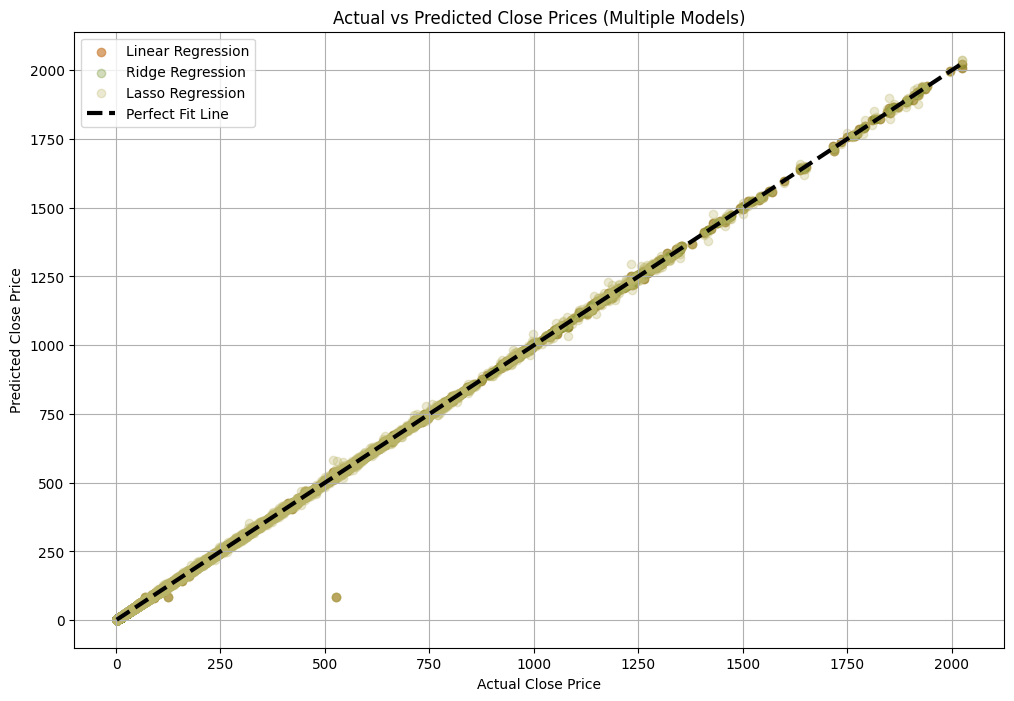

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset (change the path if needed)
data = pd.read_csv('/content/all_stocks_5yr.csv')

# Selecting multiple features for regression
features = ['open', 'high', 'low', 'volume']
X = data[features]
y = data['close']

# Imputation to handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Ridge Regression Model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# Lasso Regression Model
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE calculation
    return mse, mae, r2, rmse, mape

# Calculate metrics for each model
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_ridge = calculate_metrics(y_test, y_pred_ridge)
metrics_lasso = calculate_metrics(y_test, y_pred_lasso)

# Prepare the report
report = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2', 'RMSE', 'MAPE'],
    'Linear Regression': metrics_lr,
    'Ridge Regression': metrics_ridge,
    'Lasso Regression': metrics_lasso
})

# Print the report
print(report)

# Plotting the actual vs predicted for all models
plt.figure(figsize=(12, 8))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label="Linear Regression", color='peru', alpha=0.7)

# Ridge Regression
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", color='olivedrab', alpha=0.3)

# Lasso Regression
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression", color='darkkhaki', alpha=0.3)

# Perfect fit line (for reference)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label="Perfect Fit Line")

# Add plot labels and title
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices (Multiple Models)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Function to calculate Mallows' Cp, AIC, and BIC
def metrics(y_true, y_pred, n_params, n_samples):

    rss = np.sum((y_true - y_pred) ** 2)
    mse = mean_squared_error(y_true, y_pred)

    # Mallows' Cp
    cp = rss / mse - n_samples + 2 * n_params

    # AIC: 2k - 2ln(L)
    aic = n_samples * np.log(mse) + 2 * n_params

    # BIC: kln(n) - 2ln(L)
    bic = n_samples * np.log(mse) + n_params * np.log(n_samples)

    return cp, aic, bic

# Number of parameters in each model
n_params_lr = X_train.shape[1] + 1  # Linear regression parameters
n_params_ridge = X_train.shape[1] + 1  # Ridge has the same number of parameters
n_params_lasso = np.sum(model_lasso.coef_ != 0) + 1  # Only non-zero coefficients

# Number of samples in the test set
n_samples = y_test.shape[0]

metrics_add_lr = metrics(y_test, y_pred_lr, n_params_lr, n_samples)
metrics_add_ridge = metrics(y_test, y_pred_ridge, n_params_ridge, n_samples)
metrics_add_lasso = metrics(y_test, y_pred_lasso, n_params_lasso, n_samples)

additional_report = pd.DataFrame({
    'Metric': ['Mallows Cp', 'AIC', 'BIC'],
    'Linear Regression': metrics_add_lr,
    'Ridge Regression': metrics_add_ridge,
    'Lasso Regression': metrics_add_lasso
})

print(additional_report)


       Metric  Linear Regression  Ridge Regression  Lasso Regression
0  Mallows Cp          10.000000         10.000000         10.000000
1         AIC       89379.636962      89379.648116     163932.520658
2         BIC       89428.269398      89428.280552     163981.153095


Above implies that linear and ridge regression are good choices here.

AIC and BIC of Lasso regression is high, implying it is giving poor fit.